In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import numpy as np

# Load dataset and assign column names
data = pd.read_csv('train.txt', names=['text', 'emotion'], delimiter=';')
sns.set(style="whitegrid")
plt.rcParams["figure.facecolor"] = "#fafafa"

In [45]:
def load_and_preprocess(path='train.txt'):
    df = pd.read_csv(path, names=['text', 'emotion'], sep=';')
    df['clean_text'] = df['text'].apply(nfx.remove_special_characters).apply(str.lower)
    df.dropna(subset=['clean_text', 'emotion'], inplace=True)
    df['text_len'] = df['clean_text'].apply(len)
    return df


In [3]:
# Clean the text data by removing special characters and converting to lowercase
data['cleaned_text'] = data['text'].apply(nfx.remove_special_characters).apply(lambda x: x.lower())


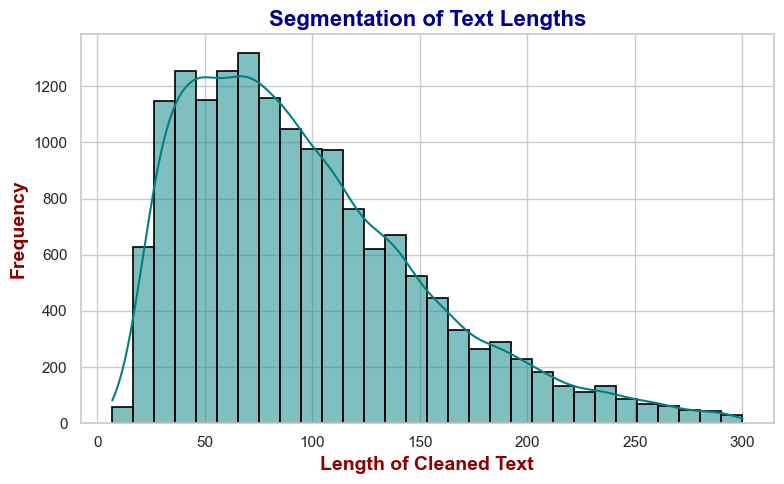

In [19]:
# Calculate the length of cleaned text
data['text_length'] = data['cleaned_text'].apply(len)

# Plot the distribution of text lengths with enhanced aesthetics
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")  # Set the background style
sns.histplot(data['text_length'], bins=30, kde=True, color='teal', edgecolor='black', linewidth=1.2)

# Title and labels with enhanced styling
plt.title("Segmentation of Text Lengths", fontsize=16, weight='bold', color='darkblue')
plt.xlabel("Length of Cleaned Text", fontsize=14, weight='bold', color='darkred')
plt.ylabel("Frequency", fontsize=14, weight='bold', color='darkred')

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


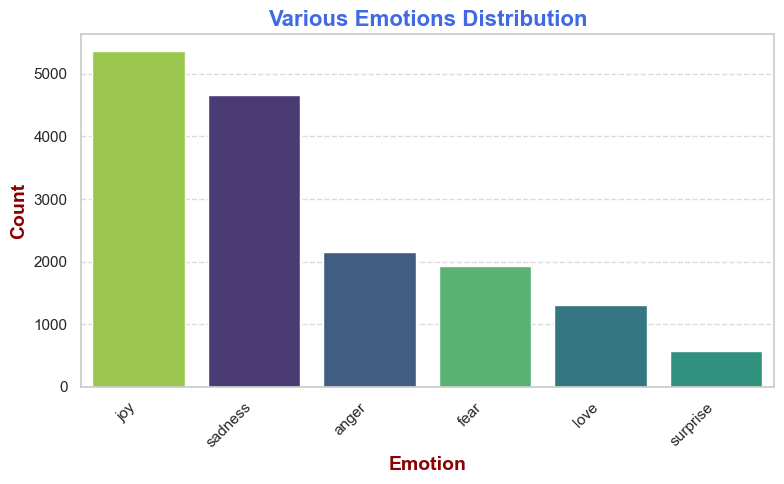

In [25]:
# Plot the distribution of emotion labels with enhanced aesthetics
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")  # Set the background style
emotion_plot = sns.countplot(data=data, x='emotion', hue='emotion', order=data['emotion'].value_counts().index, palette='viridis', legend=False)

# Add title and labels with improved styling
plt.title("Various Emotions Distribution", fontsize=16, weight='bold', color='RoyalBlue')
plt.xlabel("Emotion", fontsize=14, weight='bold', color='darkred')
plt.ylabel("Count", fontsize=14, weight='bold', color='darkred')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better visual separation
emotion_plot.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


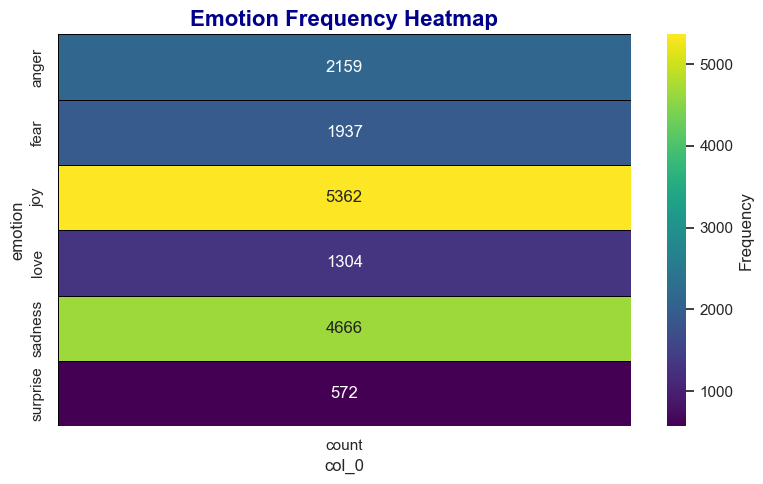

In [27]:
# Create a heatmap to show emotion frequency with advanced styling
emotion_counts = pd.crosstab(index=data['emotion'], columns='count')

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")  # Clean background style

# Create the heatmap with advanced styling
heatmap = sns.heatmap(emotion_counts, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black', cbar_kws={'label': 'Frequency'})

# Title with improved styling
plt.title("Emotion Frequency Heatmap", fontsize=16, weight='bold', color='darkblue')

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


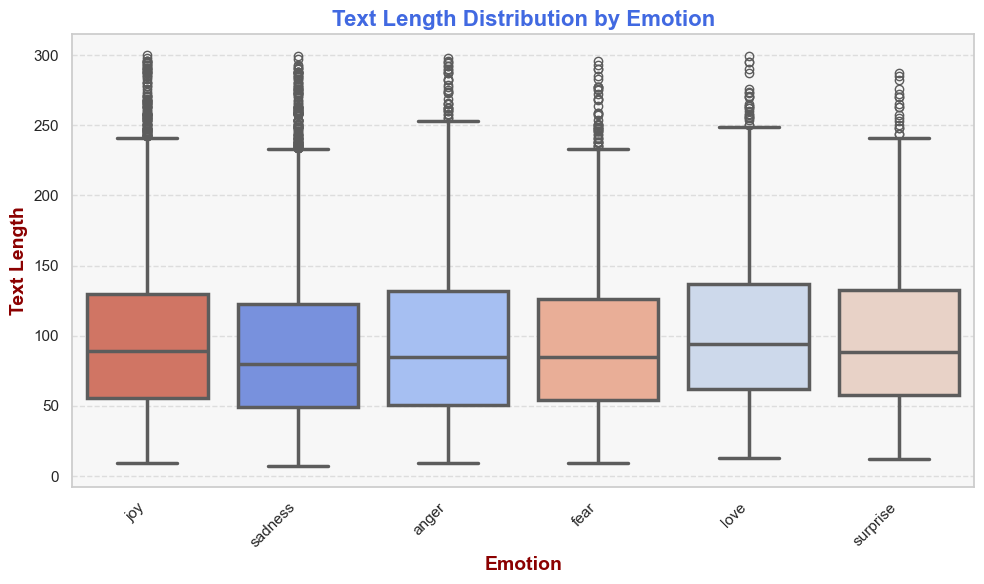

In [37]:
# Ensure the 'text_len' column is created correctly before plotting
data['text_len'] = data['cleaned_text'].apply(len)

# Visualize text length distribution by emotion with a boxplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Clean background style
plt.rcParams["axes.facecolor"] = "#f7f7f7"  # Set a soft background color for axes

# Create the boxplot with updated syntax to avoid FutureWarning
boxplot = sns.boxplot(x='emotion', y='text_len', hue='emotion', data=data,
                      order=data['emotion'].value_counts().index, palette='coolwarm', 
                      linewidth=2.5, legend=False)

# Title and labels with enhanced styling
plt.title("Text Length Distribution by Emotion", fontsize=16, weight='bold', color='Royalblue')
plt.xlabel("Emotion", fontsize=14, weight='bold', color='darkred')
plt.ylabel("Text Length", fontsize=14, weight='bold', color='darkred')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better separation
boxplot.grid(axis='y', linestyle='--', alpha=0.6)

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'clf__C': 10, 'tfidf__max_df': 0.7}

Classification Report:

              precision    recall  f1-score   support

       anger       0.88      0.79      0.83       312
        fear       0.85      0.74      0.79       265
         joy       0.84      0.95      0.89       783
        love       0.85      0.70      0.77       218
     sadness       0.89      0.92      0.90       741
    surprise       0.80      0.58      0.67        81

    accuracy                           0.86      2400
   macro avg       0.85      0.78      0.81      2400
weighted avg       0.86      0.86      0.86      2400



<Figure size 800x600 with 0 Axes>

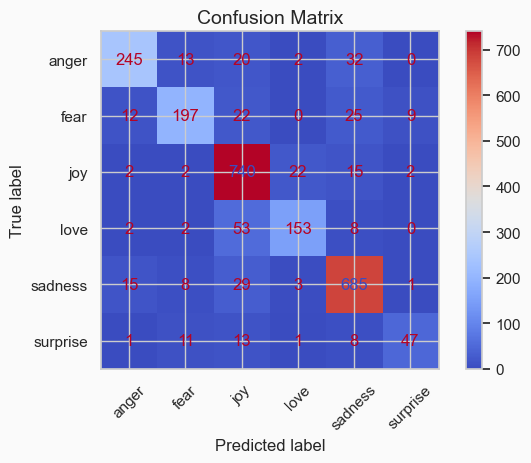


Top 10 features per emotion:

ANGER     : ['bothered', 'resentful', 'offended', 'rushed', 'distracted', 'wronged', 'petty', 'greedy', 'dangerous', 'rude']
FEAR      : ['shaky', 'apprehensive', 'intimidated', 'pressured', 'paranoid', 'reluctant', 'frantic', 'vulnerable', 'terrified', 'shaken']
JOY       : ['useful', 'respected', 'precious', 'clever', 'innocent', 'superior', 'determined', 'popular', 'satisfied', 'sincere']
LOVE      : ['loving', 'delicate', 'tender', 'longing', 'caring', 'lovely', 'naughty', 'supportive', 'sympathetic', 'nostalgic']
SADNESS   : ['doomed', 'messy', 'numb', 'gloomy', 'unwelcome', 'damaged', 'disturbed', 'unfortunate', 'melancholy', 'dumb']
SURPRISE  : ['weird', 'overwhelmed', 'dazed', 'strange', 'funny', 'shocked', 'surprised', 'curious', 'amazed', 'impressed']



Enter text to detect emotion:  dazed



Predicted Emotion: SURPRISE


<Figure size 640x480 with 0 Axes>

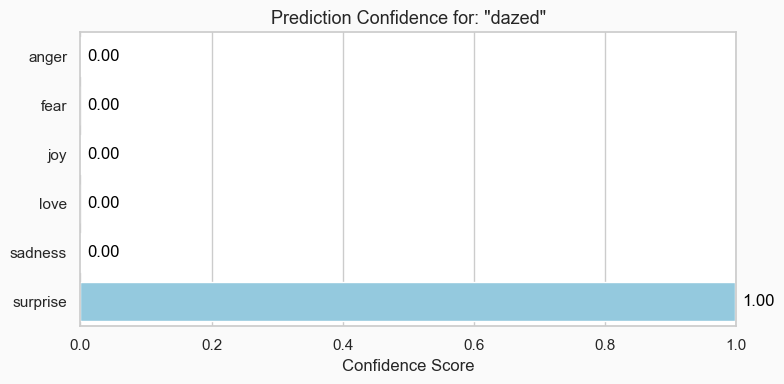

In [63]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Split Data ---
X = df['clean_text']
y = df['emotion']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Build Pipeline ---
base_model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
    ('clf', LogisticRegression(max_iter=300))
])

# --- Grid Search ---
param_grid = {
    'tfidf__max_df': [0.7, 1.0],
    'clf__C': [0.1, 1, 10]
}

grid = GridSearchCV(base_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
model = grid.best_estimator_

# --- Evaluate Model ---
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=model.named_steps['clf'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.named_steps['clf'].classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='coolwarm', xticks_rotation=45)
plt.title("Confusion Matrix", fontsize=14)
plt.tight_layout()
plt.show()

# --- Top Features by Class ---
clf = model.named_steps['clf']
tfidf = model.named_steps['tfidf']
feature_names = tfidf.get_feature_names_out()

print("\nTop 10 features per emotion:\n")
for i, label in enumerate(clf.classes_):
    top10 = clf.coef_[i].argsort()[-10:]
    features = [feature_names[j] for j in top10]
    print(f"{label.upper():<10}: {features}")

# --- Save Model ---
joblib.dump(model, "emotion_model.pkl")

# --- Load and Run Demo ---
demo_text = input("\nEnter text to detect emotion: ")
loaded_model = joblib.load("emotion_model.pkl")
pred = loaded_model.predict([demo_text])[0]
print(f"\nPredicted Emotion: {pred.upper()}")

# --- Confidence Plot ---
probs = loaded_model.predict_proba([demo_text])[0]
labels = loaded_model.classes_

plt.clf()
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=probs, y=labels, ax=ax, color='skyblue')  # Fixed to avoid FutureWarning
ax.set_title(f"Prediction Confidence for: \"{demo_text}\"", fontsize=13)
ax.set_xlabel("Confidence Score")
ax.set_xlim(0, 1)

for i, v in enumerate(probs):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

plt.tight_layout()
plt.savefig("prediction_confidence.png")
plt.show()

